In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go


In [33]:
df = pd.read_csv('./insurance.csv')
df.sample(7)

,age,sex,bmi,children,smoker,region,charges
465,30,female,28.380,1,yes,southeast,19521.96820
174,24,female,33.345,0,no,northwest,2855.43755
1298,33,male,27.455,2,no,northwest,5261.46945
1242,22,female,21.280,3,no,northwest,4296.27120
26,63,female,23.085,0,no,northeast,14451.83515
190,61,male,31.570,0,no,southeast,12557.60530
787,21,male,36.860,0,no,northwest,1917.31840


## BMI	CONDIZIONE

< 16.5	        GRAVE MAGREZZA \
16-18,49	SOTTOPESO \
18.5-24,99      NORMOPESO \
25-29,99        SOVRAPPESO \
30-34,99        OBESITÀ CLASSE I (lieve) \
35-39,99        OBESITÀ CLASSE II (media) \
\> 40	        OBESITÀCLASSE III (grave)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
print('Column Name\tNaN\tType     \tColumn Data Class')
print('------------------------------------------------------------------')
for c in df.columns:
    print(f'{c}     \t{df[c].isna().sum()}  \t{df[c].dtype}     \t{df[c].apply(type).unique()}')

Column Name	NaN	Type     	Column Data Class
------------------------------------------------------------------
age     	0  	int64     	[<class 'int'>]
sex     	0  	object     	[<class 'str'>]
bmi     	0  	float64     	[<class 'float'>]
children     	0  	int64     	[<class 'int'>]
smoker     	0  	object     	[<class 'str'>]
region     	0  	object     	[<class 'str'>]
charges     	0  	float64     	[<class 'float'>]


In [37]:
print(df.sex.unique(), df.smoker.unique(), df.region.unique())

['female' 'male'] ['yes' 'no'] ['southwest' 'southeast' 'northwest' 'northeast']


47

In [51]:
px.histogram(df, x='age', nbins=len(df.age.unique()))

In [101]:
eta = pd.DataFrame(df.groupby(['age','sex']).agg({'sex':'count'})).rename(columns={"sex": "tot"}).reset_index()

for x in set(eta.age):
    m_mask = (eta['age']==x) & (eta['sex']=='male')
    f_mask = (eta['age']==x) & (eta['sex']=='female')
    
    m = 0
    f = 0
    if (len(eta.loc[m_mask].tot) != 0):
        m = eta.loc[m_mask].tot.values[0]
    if (len(eta.loc[f_mask].tot) != 0):
        f = eta.loc[f_mask].tot.values[0]
    
    eta.loc[m_mask, 'percentualePerEta'] = 100.0 * (m / (m + f))
    eta.loc[f_mask, 'percentualePerEta'] = 100.0 * (f / (m + f))

In [104]:
figures = [   
    px.histogram(df, y='age', orientation='h', nbins=len(df.age.unique())),
px.histogram(eta, y='age', color='sex', x='percentualePerEta', orientation='h', barnorm='percent', color_discrete_map={'female':'salmon', 'male':'skyblue'})
        # px.histogram(df, y='age', color='sex', orientation='h', barnorm='percent')
]

fig = sp.make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("Distribuzione età", "Distribuzione età e sesso"), horizontal_spacing=0.009)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_yaxes(title_text="Age",  row=1, col=1)
fig.update_xaxes(title_text="Total",  row=1, col=1)
fig.update_xaxes(title_text="Percentuale età per sesso",  row=1, col=2)


fig.layout['legend']['title']['text'] = 'Sex'
fig.update_layout(
    title_text="Distribuzione studenti per età e sesso",
    barmode="stack"
)

fig.show()

In [ ]:
# import plotly.graph_objects as go
# fig = go.Figure(
#     data=[go.Bar(y=[2, 1, 3])],
#     layout_title_text="A Figure Displayed with fig.show()"
# )
# fig.show()

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

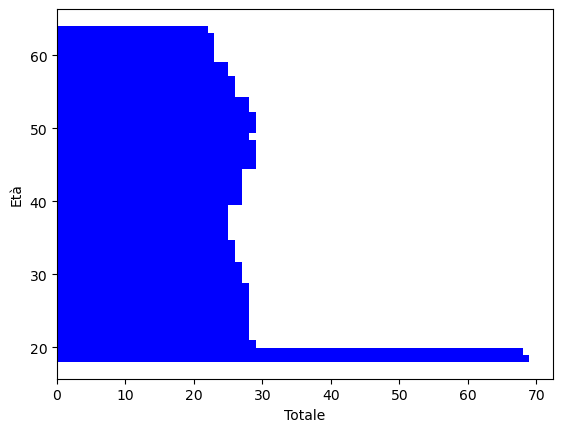

In [89]:
plot = plt.hist(df['age'], bins=df['age'].nunique(), orientation='horizontal', color='blue')
plt.xlabel('Totale')
plt.ylabel('Età')
plot.index

In [98]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=df.age, name='sum', nbinsx=len(df.age.unique()+1)))
# fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="sum"))

fig.show()